In [ ]:
import nltk
!pip install tflearn
nltk.download('punkt')

from nltk.stem.lancaster import LancasterStemmer
stemmer=LancasterStemmer()
import numpy
import tflearn
import tensorflow
import random
import json
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127283 sha256=23aa895b8d7d090f30b15b3ed1574a8e0dcb1b06e33aae5b059e17f877961339
  Stored in directory: /root/.cache/pip/wheels/55/fb/7b/e06204a0ceefa45443930b9a250cb5ebe31def0e4e8245a465
Successfully built tflearn


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
with open("sot.json") as file:
  data=json.load(file)

In [ ]:
labels = []
for intent in data['intents']:
  
  if intent['tag'] not in labels:
    labels.append(intent['tag'])
    

In [ ]:
try:
  with open("data.pickle","rb") as f: 
    words,labels,training,output=pickle.load(f)
    
except:
  words=[]
  labels=[]
  docs_x=[]
  docs_y=[]
    
  for intent in data['intents']:
    for pattern in intent['patterns']:
      wrds=nltk.word_tokenize(pattern)
      words.extend(wrds)
      docs_x.append(wrds)
      docs_y.append(intent["tag"])
             
            
      if intent["tag"] not in labels:
        labels.append(intent["tag"])
      
                          
    #remove duplicate          
  words=[stemmer.stem(w.lower()) for w in words if w != "?"]
    
  words=sorted(list(set(words)))
  labels=sorted(labels)
    
    
  training=[] 
  output=[]
    
  out_empty=[0 for _ in range(len(labels))]
    
  for x, doc in enumerate(docs_x):
    bag=[]
    wrds=[stemmer.stem(w) for w in doc]
        
    for w in words:
      if w in wrds:
        bag.append(1)
      else:
        bag.append(0)
             
    output_row=out_empty[:]
             
    output_row[labels.index(docs_y[x])]=1
        
    training.append(bag)     
    output.append(output_row)
        
  training=numpy.array(training)
  output=numpy.array(output)
    
  with open("data.pickle","wb") as f:
        pickle.dump((words,labels,training,output),f)


In [ ]:
print(labels)

[' Head of the Department', ' T & P Cell', 'AF', 'About Assam University', 'Bot', 'Computer Science and Engineering', 'Courses of cse', 'DL', 'EN', 'Electronic and communication Engineering (ECE)', 'Exit', 'FAcultyofece', 'Goal of Electronic and communication Engineering (ECE)', 'History of Assam University', 'LR', 'Laboratory ofece', 'ML', 'NB', 'NN', 'Notification', 'OP', 'Olympus', 'Profane', 'SVM', 'Ticket', 'agri', 'agri 2', 'agri 3', 'agri 4', 'agri 5', 'agri 6', 'agri 7', 'agri 8', 'agri 9', 'aluminiofece', 'computer science and engineering', 'department library ofece', 'electives subject ofece', 'faculty and staff', 'nameofthehodofece', 'placement scenario of Electronic and communication Engineering (ECE)', 'topper list of Btech and Mtech ece', 'training and placement cell of ece']


In [ ]:

tensorflow.compat.v1.reset_default_graph()

net=tflearn.input_data(shape=[None,len(training[0])])
net=tflearn.fully_connected(net,8) 
net=tflearn.fully_connected(net,8)
net=tflearn.fully_connected(net,len(output[0]),activation="softmax")
net=tflearn.regression(net)

model=tflearn.DNN(net)

model.fit(training, output,n_epoch=300,batch_size=8,show_metric=True )   

model.save('model.tflearn')
model.load('model.tflearn')

Training Step: 25499  | total loss: 0.18330 | time: 0.380s
| Adam | epoch: 300 | loss: 0.18330 - acc: 0.8942 -- iter: 672/680
Training Step: 25500  | total loss: 0.17581 | time: 0.385s
| Adam | epoch: 300 | loss: 0.17581 - acc: 0.8923 -- iter: 680/680
--


In [ ]:
def bag_of_words(s,words):
  bag=[0 for _ in range(len(words))]
  s_words=nltk.word_tokenize(s)
  s_words=[stemmer.stem(word.lower()) for word in s_words]

 
  for se in s_words:
    for i,w in enumerate(words):
      if w==se:
        bag[i]=1

  return numpy.array(bag)

In [22]:
#from langchain.document_loaders import UnstructuredURLLoader
#from langchain.document_loaders import PDFMinerLoader
#from langchain.document_loaders import TextLoader
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering
def chat():
  print("start talking with the bot (type quit to stop!")
  while True:
    question=input("You:")
    if question.lower()=="quit":
      break    
    results= model.predict([bag_of_words(question,words)])[0]
        # print("results:",results)
       
    results_index=numpy.argmax(results)
        
    if results[results_index]>0:
      tag=labels[results_index]
      print(tag) 
    for tg in data["intents"]:
      if tg["tag"]==tag:
        responses=tg['responses']
        print(responses) 
    
    context = str(responses)
   

    result = nlp(question=question, context=context)

# Extract the answer
    answer = result["answer"]   
    print("Bot: "+ answer)

   






#response = get_llm_response(inp,responses)  
#print("Bot: "+ response)
chat() 

start talking with the bot (type quit to stop!


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-6a36716efb24>", line 42, in <cell line: 42>
    chat()
  File "<ipython-input-22-6a36716efb24>", line 8, in chat
    question=input("You:")
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object 

TypeError: ignored

In [15]:
import json

def convert_to_squad_format(data):
    squad_data = {
        "data": []
    }

    for example in data:
        context = example['context']
        question = example['question']
        answer = example['answer']

        if answer not in context:
            continue  # Skip examples where the answer is not found in the context

        squad_example = {
            "paragraphs": [
                {
                    "context": context,
                    "qas": [
                        {
                            "question": question,
                            "id": f"{question[:20]}_{answer[:20]}",  # Generating a unique ID for each question-answer pair
                            "answers": [
                                {
                                    "text": answer,
                                    "answer_start": context.index(answer)
                                }
                            ]
                        }
                    ]
                }
            ]
        }

        squad_data["data"].append(squad_example)

    return squad_data

# Load your dataset
with open('agri.json', 'r') as file:
    data = json.load(file)

# Convert to SQuAD format
squad_data = convert_to_squad_format(data)

# Save the converted dataset to a new JSON file
with open('sot_squad_new.json', 'w') as file:
    json.dump(squad_data, file, indent=4)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Question: When did Assam University come into existence?
Predicted Answer: 1994
Ground Truth Answer: 1994

Question: Where is the main campus located?
Predicted Answer: Dargakona
Ground Truth Answer: Dargakona

Question: Who laid the foundation stone of Assam University?
Predicted Answer: Topodhir Bhattacharjee
Ground Truth Answer: Prime Minister Shri P. V. Narsimha Rao

Question: What was the name of the Vice Chancellor?
Predicted Answer: Topodhir Bhattacharjee
Ground Truth Answer: Prof. Rajive Mohan Pant

Question: What was the first room at Assam University?
Predicted Answer: Silchar Circuit House
Ground Truth Answer: silchar Circuit House

Question: On what date did the university become operational?
Predicted Answer: January 21, 1994
Ground Truth Answer: January 21, 1994

Question: How many acres of campus does the university boast?
Predicted Answer: 600
Ground Truth Answer: 600

Question: What is the name of the 600-acre campus at Silchar?
Predicted Answer: Diphu
Ground Truth Ans

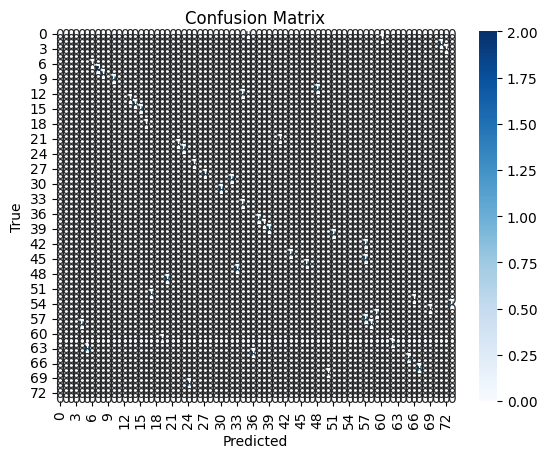

Accuracy: 0.3877551020408163
Fuzzy F1 Score: 69.65306122448979


In [29]:
from transformers import pipeline
import json
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the default question answering pipeline
qa_pipeline = pipeline("question-answering")

# Load the JSON data
with open('sot_squad_new.json', 'r') as file:
    data = json.load(file)

# Initialize lists for storing predicted and ground truth answers
predicted_answers = []
ground_truth_answers = []

for example in data['data']:
    context = example['paragraphs'][0]['context']
    qa_pairs = example['paragraphs'][0]['qas']

    for qa_pair in qa_pairs:
        question = qa_pair['question']
        answer = qa_pair['answers'][0]['text']

        # Generate the answer
        result = qa_pipeline(question=question, context=context)

        predicted_answer = result['answer']
        ground_truth_answer = answer

        predicted_answers.append(predicted_answer)
        ground_truth_answers.append(ground_truth_answer)

        print("Question:", question)
        print("Predicted Answer:", predicted_answer)
        print("Ground Truth Answer:", ground_truth_answer)
        print()

# Compute fuzzy matching scores
fuzzy_scores = [fuzz.token_sort_ratio(ground_truth, predicted) for ground_truth, predicted in zip(ground_truth_answers, predicted_answers)]

# Compute accuracy
accuracy = accuracy_score(ground_truth_answers, predicted_answers)

# Compute confusion matrix
cm = confusion_matrix(ground_truth_answers, predicted_answers)

# Plot confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy)
print("Fuzzy F1 Score:", sum(fuzzy_scores) / len(fuzzy_scores))


In [8]:
import csv
import json

def csv_to_json(csv_file, json_file):
    data = []
    with open(csv_file, 'r', encoding='cp1252') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append({
                'context': row['context'],
                'question': row['question'],
                'answer': row['answer']
            })

    with open(json_file, 'w') as file:
        json.dump(data, file, indent=4)

# Provide the file paths for input CSV and output JSON files
csv_file_path = 'agri.csv'
json_file_path = 'agri.json'

csv_to_json(csv_file_path, json_file_path)
